In [2]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

## **Real news datasets**

In [2]:
# read csvs of 3 scraped sites: all sides, AP & reuters

politifact_df = pd.read_csv("/Users/jackgibbons/Documents/Bootcamp/Homework/Final_project/fake-news-detection/files/scraped_articles/allsides_df_final.csv")
ap_df = pd.read_csv("/Users/jackgibbons/Documents/Bootcamp/Homework/Final_project/fake-news-detection/files/scraped_articles/assocciated_press_df.csv")
reuters_df = pd.read_csv("/Users/jackgibbons/Documents/Bootcamp/Homework/Final_project/fake-news-detection/files/scraped_articles/reuters_df.csv")

In [3]:
# öets check the articles scraped from politifact

politifact_df.head()

,Unnamed: 0,headline,source,url,text
0,0,Supreme Court hears arguments on restrictive T...,NBC News (Online),https://www.allsides.com/news/2021-11-01-0752/...,The Supreme Court on Monday is taking up two c...
1,1,NAACP urges pro athletes not to sign with team...,CBS News (Online),https://www.allsides.com/news/2021-10-28-1407/...,The NAACP is calling on professional athletes ...
2,2,Supreme Court won’t block Texas abortion law b...,Washington Post,https://www.allsides.com/news/2021-10-22-1544/...,The Supreme Court on Friday said it will consi...
3,3,The Supreme Court Won’t Halt Texas’s Abortion ...,BuzzFeed News,https://www.allsides.com/news/2021-10-22-1121/...,The US Supreme Court will allow Texas’s six-we...
4,4,D.C. assistant police chief says she was told ...,NBC News (Online),https://www.allsides.com/news/2021-10-22-0555/...,"The assistant police chief in Washington, D.C...."


In [4]:
politifact_df['source'].value_counts()

AllSides Headline Roundup    112
Washington Examiner           58
CNN (Online News)             58
New York Post (News)          55
Axios                         52
                            ... 
The Nation                     1
Variety                        1
The New Yorker                 1
The Week - Opinion             1
Gallup                         1
Name: source, Length: 150, dtype: int64

In [5]:
# check for duplicated texts

politifact_df['text'].duplicated().value_counts()

False    1274
True      392
Name: text, dtype: int64

In [6]:
# drop row if the text is the duplicated

politifact_df.drop_duplicates(subset=['text'], inplace=True)
politifact_df

,Unnamed: 0,headline,source,url,text
0,0,Supreme Court hears arguments on restrictive T...,NBC News (Online),https://www.allsides.com/news/2021-11-01-0752/...,The Supreme Court on Monday is taking up two c...
1,1,NAACP urges pro athletes not to sign with team...,CBS News (Online),https://www.allsides.com/news/2021-10-28-1407/...,The NAACP is calling on professional athletes ...
2,2,Supreme Court won’t block Texas abortion law b...,Washington Post,https://www.allsides.com/news/2021-10-22-1544/...,The Supreme Court on Friday said it will consi...
3,3,The Supreme Court Won’t Halt Texas’s Abortion ...,BuzzFeed News,https://www.allsides.com/news/2021-10-22-1121/...,The US Supreme Court will allow Texas’s six-we...
4,4,D.C. assistant police chief says she was told ...,NBC News (Online),https://www.allsides.com/news/2021-10-22-0555/...,"The assistant police chief in Washington, D.C...."
...,...,...,...,...,...
1655,1655,2020 Census Results Show Big Changes to Americ...,AllSides Headline Roundup,https://www.allsides.com/story/how-2020-census...,"According to the 2020 United States Census, th..."
1656,1656,"Dems and GOP Strike Short-Term Deal on Debt, b...",AllSides Headline Roundup,https://www.allsides.com/story/dems-and-gop-st...,Democrats and Republicans have reached a tempo...
1657,1657,January 6 Committee Votes to Hold Steve Bannon...,AllSides Headline Roundup,https://www.allsides.com/story/january-6-commi...,"On Tuesday evening, the House Committee invest..."
1659,1659,Biden Picks Susan Rice to Lead Domestic Policy...,AllSides Headline Roundup,https://www.allsides.com/story/biden-picks-sus...,State-certified 2020 presidential election win...


In [7]:
politifact_df = politifact_df.drop(columns=['Unnamed: 0'])

In [8]:
# lets check the articles scraped from the associated press

ap_df

,Unnamed: 0,headline,source,urls,text
0,0,Watanabe re-elected as international gymnastic...,AP,https://apnews.com/article/coronavirus-pandemi...,WASHINGTON (AP) — The U.S. economy was suppose...
1,1,Biden’s bet that economy would boost Democrats...,AP,https://apnews.com/article/pennsylvania-race-a...,"NEW HOPE, Pa. (AP) — The Democrats of Bucks Co..."
2,2,Local Democrats warn party: Growing Republican...,AP,https://apnews.com/article/elections-virginia-...,"RICHMOND, Va. (AP) — Democratic leaders in Vir..."
3,3,Today in History,AP,https://apnews.com/article/business-religion-e...,"RICHMOND, Va (AP) — Republican Glenn Youngkin ..."
4,4,Biden’s bet that economy would boost Democrats...,AP,https://apnews.com/article/elections-virginia-...,"RICHMOND, Va. (AP) — A juvenile son of Virgini..."
...,...,...,...,...,...
968,968,Latest Wisconsin poll shows slipping ratings f...,AP,https://apnews.com/article/joe-biden-wisconsin...,MILWAUKEE (AP) — The latest Marquette Universi...
969,969,Takeaways from Tuesday’s elections: Bad omens ...,AP,https://apnews.com/article/election-night-take...,The off-year elections for governor in Virgini...
970,970,NaN,AP,https://apnews.com/article/coronavirus-pandemi...,"McALLEN, Texas (AP) — For about four months be..."
971,971,NaN,AP,https://apnews.com/article/joe-biden-nevada-un...,LAS VEGAS (AP) — President Joe Biden on Wednes...


In [9]:
# some urls had no text in the article body so i will drop these rows

ap_df.drop(ap_df[ap_df['text']== 'no text'].index, inplace=True)

In [10]:
# there are also some missing headlines so will drop these too

ap_df['headline'].isna().sum()

83

In [11]:
ap_df.drop(ap_df[ap_df['headline'].isna()].index, inplace=True)

In [12]:
# unnamed: 0 column has been generated automatically and is not needed - will drop this too

ap_df = ap_df.drop(columns=['Unnamed: 0'])

In [13]:
# now I will check if there are any duplicate articles scraped

ap_df['text'].duplicated().value_counts()

False    608
True     260
Name: text, dtype: int64

In [14]:
# drop duplicate rows

ap_df.drop_duplicates(subset=['text'], inplace=True)
ap_df

,headline,source,urls,text
0,Watanabe re-elected as international gymnastic...,AP,https://apnews.com/article/coronavirus-pandemi...,WASHINGTON (AP) — The U.S. economy was suppose...
1,Biden’s bet that economy would boost Democrats...,AP,https://apnews.com/article/pennsylvania-race-a...,"NEW HOPE, Pa. (AP) — The Democrats of Bucks Co..."
2,Local Democrats warn party: Growing Republican...,AP,https://apnews.com/article/elections-virginia-...,"RICHMOND, Va. (AP) — Democratic leaders in Vir..."
3,Today in History,AP,https://apnews.com/article/business-religion-e...,"RICHMOND, Va (AP) — Republican Glenn Youngkin ..."
4,Biden’s bet that economy would boost Democrats...,AP,https://apnews.com/article/elections-virginia-...,"RICHMOND, Va. (AP) — A juvenile son of Virgini..."
...,...,...,...,...
960,Iran marks anniversary of 1979 takeover of US ...,AP,https://apnews.com/article/coronavirus-pandemi...,"TEHRAN, Iran (AP) — Thousands of Iranians gath..."
964,"Murphy ekes out win in NJ, GOP’s Youngkin upse...",AP,https://apnews.com/article/election-2021-virgi...,"RICHMOND, Va. (AP) — Democratic Gov. Phil Murp..."
967,AP FACT CHECK: Biden distorts Virginia’s elect...,AP,https://apnews.com/article/joe-biden-ap-fact-c...,WASHINGTON (AP) — Downplaying his party’s loss...
968,Latest Wisconsin poll shows slipping ratings f...,AP,https://apnews.com/article/joe-biden-wisconsin...,MILWAUKEE (AP) — The latest Marquette Universi...


In [15]:
# lets check the articles scraped from reuters

reuters_df

,Unnamed: 0,headline,source,urls,text
0,0,UK to roll out COVID-19 antiviral drug trial t...,reuters,https://www.reuters.com/business/healthcare-ph...,"LONDON, Nov 7 (Reuters) - Britain will start t..."
1,1,UK's Truss to visit southeast Asia to boost ec...,reuters,https://www.reuters.com/world/uk/uks-truss-vis...,"LONDON, Nov 7 (Reuters) - British Foreign Secr..."
2,2,UB40 founding member Astro dies after short il...,reuters,https://www.reuters.com/world/uk/ub40-founding...,"LONDON, Nov 7 (Reuters) - One of the founding ..."
3,3,Big crowds rally in rainy Glasgow for COP26 cl...,reuters,https://www.reuters.com/business/cop/thousands...,"GLASGOW, Nov 6 (Reuters) - Tens of thousands o..."
4,4,"UK reports 155 new COVID deaths, 30,693 cases ...",reuters,https://www.reuters.com/world/uk/uk-reports-15...,"LONDON, Nov 6 (Reuters) - Britain reported 155..."
...,...,...,...,...,...
479,479,Banks’ green push requires more stick than carrot,reuters,https://www.reuters.com/business/cop/banks-gre...,"LONDON, Nov 4 (Reuters Breakingviews) - Bank w..."
480,480,Ford gives Toyota a run for its money,reuters,https://www.reuters.com/breakingviews/ford-giv...,"MELBOURNE, Nov 4 (Reuters Breakingviews) - Toy..."
481,481,E-brokers are big reach for Beijing’s long arm,reuters,https://www.reuters.com/breakingviews/e-broker...,"HONG KONG, Nov 4 (Reuters Breakingviews) - Eve..."
482,482,Powell's path to second Fed term becomes wider,reuters,https://www.reuters.com/breakingviews/powells-...,"WASHINGTON, Nov 3 (Reuters Breakingviews) - So..."


In [16]:
reuters_df = reuters_df.drop(columns=['Unnamed: 0'])

In [17]:
# check for duplicates

reuters_df.duplicated().value_counts()

False    380
True     104
dtype: int64

In [18]:
reuters_df.drop_duplicates(inplace=True)
reuters_df

,headline,source,urls,text
0,UK to roll out COVID-19 antiviral drug trial t...,reuters,https://www.reuters.com/business/healthcare-ph...,"LONDON, Nov 7 (Reuters) - Britain will start t..."
1,UK's Truss to visit southeast Asia to boost ec...,reuters,https://www.reuters.com/world/uk/uks-truss-vis...,"LONDON, Nov 7 (Reuters) - British Foreign Secr..."
2,UB40 founding member Astro dies after short il...,reuters,https://www.reuters.com/world/uk/ub40-founding...,"LONDON, Nov 7 (Reuters) - One of the founding ..."
3,Big crowds rally in rainy Glasgow for COP26 cl...,reuters,https://www.reuters.com/business/cop/thousands...,"GLASGOW, Nov 6 (Reuters) - Tens of thousands o..."
4,"UK reports 155 new COVID deaths, 30,693 cases ...",reuters,https://www.reuters.com/world/uk/uk-reports-15...,"LONDON, Nov 6 (Reuters) - Britain reported 155..."
...,...,...,...,...
479,Banks’ green push requires more stick than carrot,reuters,https://www.reuters.com/business/cop/banks-gre...,"LONDON, Nov 4 (Reuters Breakingviews) - Bank w..."
480,Ford gives Toyota a run for its money,reuters,https://www.reuters.com/breakingviews/ford-giv...,"MELBOURNE, Nov 4 (Reuters Breakingviews) - Toy..."
481,E-brokers are big reach for Beijing’s long arm,reuters,https://www.reuters.com/breakingviews/e-broker...,"HONG KONG, Nov 4 (Reuters Breakingviews) - Eve..."
482,Powell's path to second Fed term becomes wider,reuters,https://www.reuters.com/breakingviews/powells-...,"WASHINGTON, Nov 3 (Reuters Breakingviews) - So..."


In [19]:
# now lets merge the 3 dfs into 1 df

politifact_df = politifact_df.rename(columns={"url": "urls"}) # rename column so it matches the other 2 dfs

true_scraped_df = pd.concat([reuters_df, ap_df, politifact_df])
true_scraped_df

,headline,source,urls,text
0,UK to roll out COVID-19 antiviral drug trial t...,reuters,https://www.reuters.com/business/healthcare-ph...,"LONDON, Nov 7 (Reuters) - Britain will start t..."
1,UK's Truss to visit southeast Asia to boost ec...,reuters,https://www.reuters.com/world/uk/uks-truss-vis...,"LONDON, Nov 7 (Reuters) - British Foreign Secr..."
2,UB40 founding member Astro dies after short il...,reuters,https://www.reuters.com/world/uk/ub40-founding...,"LONDON, Nov 7 (Reuters) - One of the founding ..."
3,Big crowds rally in rainy Glasgow for COP26 cl...,reuters,https://www.reuters.com/business/cop/thousands...,"GLASGOW, Nov 6 (Reuters) - Tens of thousands o..."
4,"UK reports 155 new COVID deaths, 30,693 cases ...",reuters,https://www.reuters.com/world/uk/uk-reports-15...,"LONDON, Nov 6 (Reuters) - Britain reported 155..."
...,...,...,...,...
1655,2020 Census Results Show Big Changes to Americ...,AllSides Headline Roundup,https://www.allsides.com/story/how-2020-census...,"According to the 2020 United States Census, th..."
1656,"Dems and GOP Strike Short-Term Deal on Debt, b...",AllSides Headline Roundup,https://www.allsides.com/story/dems-and-gop-st...,Democrats and Republicans have reached a tempo...
1657,January 6 Committee Votes to Hold Steve Bannon...,AllSides Headline Roundup,https://www.allsides.com/story/january-6-commi...,"On Tuesday evening, the House Committee invest..."
1659,Biden Picks Susan Rice to Lead Domestic Policy...,AllSides Headline Roundup,https://www.allsides.com/story/biden-picks-sus...,State-certified 2020 presidential election win...


In [20]:
# read a csv of true news articles downloaded from kaggle (the articles are all from reuters)
# i will take a selection of articles from this and merge them with the articles i scraped

true_kaggle = pd.read_csv("/Users/jackgibbons/Documents/Bootcamp/Homework/Final_project/fake-news-detection/files/kaggle_datasets/True.csv")
true_kaggle

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [21]:
# drop duplicate rows

true_kaggle.drop_duplicates(inplace=True)

In [22]:
true_kaggle.duplicated().value_counts()

False    21211
dtype: int64

In [23]:
true_kaggle['subject'].value_counts()

politicsNews    11220
worldnews        9991
Name: subject, dtype: int64

In [24]:
# just keep the rows with 'world news'. I have enough US news from the scraped articles.

true_kaggle.drop(true_kaggle[true_kaggle['subject'] == 'politicsNews'].index, inplace = True)


In [25]:
true_kaggle

,title,text,subject,date
11272,Reuters journalists in Myanmar appear in court...,YANGON (Reuters) - Two Reuters journalists who...,worldnews,"December 27, 2017"
11273,Kuwait says GCC to keep operating despite Qata...,DUBAI (Reuters) - Kuwait s deputy foreign mini...,worldnews,"December 27, 2017"
11274,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017"
11275,Syrian rebels say discussing evacuation from t...,BEIRUT (Reuters) - Syrian rebels in a pocket o...,worldnews,"December 27, 2017"
11276,"Trump to host Norway's Solberg on Jan. 10, Whi...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"December 27, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [26]:
# sample 5000 random rows from the dataframe

true_kaggle_sample = true_kaggle.sample(n=5000, random_state=1)
true_kaggle_sample

,title,text,subject,date
12955,Tillerson to visit Africa in first quarter of ...,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",worldnews,"December 6, 2017"
19131,Swedish court sentences Syrian asylum seeker t...,STOCKHOLM (Reuters) - A Swedish court on Monda...,worldnews,"September 25, 2017"
13956,Irish election likely after opposition submits...,DUBLIN (Reuters) - An Irish general election a...,worldnews,"November 24, 2017"
13401,Argentina blocks some activists from attending...,BUENOS AIRES (Reuters) - Argentina revoked the...,worldnews,"November 30, 2017"
19009,"Kremlin, after Kurdish vote, says supports int...",MOSCOW (Reuters) - The Kremlin on Tuesday sign...,worldnews,"September 26, 2017"
...,...,...,...,...
14258,Zimbabweans pour onto Harare streets in jubila...,HARARE (Reuters) - Thousands of Zimbabweans po...,worldnews,"November 21, 2017"
13226,Irish government says significant progress on ...,DUBLIN (Reuters) - Ireland has made significa...,worldnews,"December 4, 2017"
12401,EU parliament backs starting next phase of Bre...,STRASBOURG (Reuters) - The European Parliament...,worldnews,"December 13, 2017"
14002,Five Ukrainian servicemen killed in eastern Uk...,KIEV (Reuters) - Five Ukrainian servicemen wer...,worldnews,"November 24, 2017"


In [27]:
# add following cols to df so it matches with the df of scraped articles

true_kaggle_sample.insert(1, "source", 'reuters', True)
true_kaggle_sample.insert(2, "urls","")

In [28]:
# drop unnecessary columns

true_kaggle_sample = true_kaggle_sample.drop(columns=['subject', 'date'])
true_kaggle_sample = true_kaggle_sample.rename(columns={"title": "headline"})

In [29]:
# concat the df of scraped articles with the sample of 5000 articles

true_df = pd.concat([true_kaggle_sample, true_scraped_df]).reset_index(drop=True)
true_df


,headline,source,urls,text
0,Tillerson to visit Africa in first quarter of ...,reuters,,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se..."
1,Swedish court sentences Syrian asylum seeker t...,reuters,,STOCKHOLM (Reuters) - A Swedish court on Monda...
2,Irish election likely after opposition submits...,reuters,,DUBLIN (Reuters) - An Irish general election a...
3,Argentina blocks some activists from attending...,reuters,,BUENOS AIRES (Reuters) - Argentina revoked the...
4,"Kremlin, after Kurdish vote, says supports int...",reuters,,MOSCOW (Reuters) - The Kremlin on Tuesday sign...
...,...,...,...,...
7257,2020 Census Results Show Big Changes to Americ...,AllSides Headline Roundup,https://www.allsides.com/story/how-2020-census...,"According to the 2020 United States Census, th..."
7258,"Dems and GOP Strike Short-Term Deal on Debt, b...",AllSides Headline Roundup,https://www.allsides.com/story/dems-and-gop-st...,Democrats and Republicans have reached a tempo...
7259,January 6 Committee Votes to Hold Steve Bannon...,AllSides Headline Roundup,https://www.allsides.com/story/january-6-commi...,"On Tuesday evening, the House Committee invest..."
7260,Biden Picks Susan Rice to Lead Domestic Policy...,AllSides Headline Roundup,https://www.allsides.com/story/biden-picks-sus...,State-certified 2020 presidential election win...


In [30]:
# add classification column
# later we will conact this df with the df of fake articles

true_df.insert(4, 'classification', 'real')

In [31]:
true_df

,headline,source,urls,text,classification
0,Tillerson to visit Africa in first quarter of ...,reuters,,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",real
1,Swedish court sentences Syrian asylum seeker t...,reuters,,STOCKHOLM (Reuters) - A Swedish court on Monda...,real
2,Irish election likely after opposition submits...,reuters,,DUBLIN (Reuters) - An Irish general election a...,real
3,Argentina blocks some activists from attending...,reuters,,BUENOS AIRES (Reuters) - Argentina revoked the...,real
4,"Kremlin, after Kurdish vote, says supports int...",reuters,,MOSCOW (Reuters) - The Kremlin on Tuesday sign...,real
...,...,...,...,...,...
7257,2020 Census Results Show Big Changes to Americ...,AllSides Headline Roundup,https://www.allsides.com/story/how-2020-census...,"According to the 2020 United States Census, th...",real
7258,"Dems and GOP Strike Short-Term Deal on Debt, b...",AllSides Headline Roundup,https://www.allsides.com/story/dems-and-gop-st...,Democrats and Republicans have reached a tempo...,real
7259,January 6 Committee Votes to Hold Steve Bannon...,AllSides Headline Roundup,https://www.allsides.com/story/january-6-commi...,"On Tuesday evening, the House Committee invest...",real
7260,Biden Picks Susan Rice to Lead Domestic Policy...,AllSides Headline Roundup,https://www.allsides.com/story/biden-picks-sus...,State-certified 2020 presidential election win...,real


## **Fake news dataset**

- This dataset is a dataset of fake news which was scraped in 2016/2017 using a google chrome extension which checks for fake news 
- https://www.kaggle.com/mrisdal/fake-news
- the articles have been classified into a few different types: bias, bs, conspiracy etc. i will just keep the ones classified as bs
- i will also remove all the non english articles

In [32]:
fake_df = pd.read_csv("/Users/jackgibbons/Documents/Bootcamp/Homework/Final_project/fake-news-detection/files/kaggle_datasets/fake.csv")
fake_df 

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [33]:
# check for duplicate rows

fake_df.duplicated().value_counts()

False    12999
dtype: int64

In [34]:
fake_df['type'].value_counts() 

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

In [35]:
# just keep the 'bs' rows

fake_df_copy = fake_df[fake_df['type'] == 'bs'].reset_index(drop=True)

In [36]:
fake_df_copy['language'].value_counts()

english       10900
russian         203
spanish         172
german          111
french           37
arabic           22
portuguese       11
turkish          10
italian           9
greek             4
ignore            4
norwegian         3
dutch             3
chinese           1
polish            1
finnish           1
Name: language, dtype: int64

In [37]:
fake_df_copy = fake_df_copy[fake_df_copy['language'] == 'english'].reset_index(drop=True)

In [38]:
# lets drop the irrelevant columns. we only want the headline, url and text so it matches the true articles df

fake_df_copy = fake_df_copy.drop(columns= ['uuid', 'ord_in_thread', 'published', 'language', 'crawled', 'country', 'domain_rank', 'spam_score', 
'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares'])

In [39]:
fake_df_copy

,author,title,text,site_url,thread_title,type
0,tokyowashi (noreply@blogger.com),#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
1,Anonymous,NaN,"So ,you have Rothschild banksters and British ...",abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
2,Anonymous,NaN,Here is the problem . The USA constitution sta...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
3,Anonymous,NaN,There is plenty of proof the machines are rigg...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
4,Anonymous,NaN,Trump has an excuse now to audit any vote with...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
...,...,...,...,...,...,...
10895,replaceme,NaN,It DOES allow you to put a dog face on top of ...,zerohedge.com,"Snapchat To Raise Up To $4 Billion In IPO, Val...",bs
10896,Freedumb,NaN,Wait till you see what happens to the valuatio...,zerohedge.com,"Snapchat To Raise Up To $4 Billion In IPO, Val...",bs
10897,major major maj...,NaN,I'm waiting for the one that puts a pussy on m...,zerohedge.com,"Snapchat To Raise Up To $4 Billion In IPO, Val...",bs
10898,beemasters,NaN,$4 Billion even after they are known to be kee...,zerohedge.com,"Snapchat To Raise Up To $4 Billion In IPO, Val...",bs


In [40]:

# check how many null values are in the title column
fake_df_copy['title'].isna().sum()

573

In [41]:
# drop the rows without a headline
fake_df_copy = fake_df_copy.dropna(subset=['title']).reset_index(drop=True)

In [42]:
fake_df_copy

,author,title,text,site_url,thread_title,type
0,tokyowashi (noreply@blogger.com),#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
1,tokyowashi (noreply@blogger.com),#2817: Serco's Zulu Starnet Blackmail – Clinto...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2817: Serco's Zulu Starnet Blackmail – Clinto...,bs
2,tokyowashi (noreply@blogger.com),Roger Stone update on Stop the Steal exit poll...,\nRoger Stone: Hillary Plans to Steal Election...,abeldanger.net,Roger Stone update on Stop the Steal exit poll...,bs
3,tokyowashi (noreply@blogger.com),#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,bs
4,tokyowashi (noreply@blogger.com),Trump Advocates the American People's Control ...,\n\nMindblowing Reason Elites Fear Donald Trum...,abeldanger.net,Trump Advocates the American People's Control ...,bs
...,...,...,...,...,...,...
10322,NaN,Tesla Earnings Smash Expectations After Dramat...,"Oct 26, 2016 4:26 PM 0 SHARES \nThere was a su...",zerohedge.com,Tesla Earnings Smash Expectations After Dramat...,bs
10323,Tyler Durden,Rules For Rulers (Or How The World Really Works),"The following video is a must watch, particula...",zerohedge.com,Rules For Rulers (Or How The World Really Works),bs
10324,George Washington,Fact Check: Trump Is Right that Clinton Might ...,She explains : \nHillary Clinton wants to star...,zerohedge.com,Fact Check: Trump Is Right that Clinton Might ...,bs
10325,Tyler Durden,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",zerohedge.com,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,bs


In [43]:
# check for duplicate texts
fake_df_copy['text'].duplicated().value_counts()

False    9915
True      412
Name: text, dtype: int64

In [44]:
# drop rows with duplicate texts
fake_df_copy.drop_duplicates(subset=['text']).reset_index(drop=True)

,author,title,text,site_url,thread_title,type
0,tokyowashi (noreply@blogger.com),#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
1,tokyowashi (noreply@blogger.com),#2817: Serco's Zulu Starnet Blackmail – Clinto...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2817: Serco's Zulu Starnet Blackmail – Clinto...,bs
2,tokyowashi (noreply@blogger.com),Roger Stone update on Stop the Steal exit poll...,\nRoger Stone: Hillary Plans to Steal Election...,abeldanger.net,Roger Stone update on Stop the Steal exit poll...,bs
3,tokyowashi (noreply@blogger.com),#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,bs
4,tokyowashi (noreply@blogger.com),Trump Advocates the American People's Control ...,\n\nMindblowing Reason Elites Fear Donald Trum...,abeldanger.net,Trump Advocates the American People's Control ...,bs
...,...,...,...,...,...,...
9910,NaN,Tesla Earnings Smash Expectations After Dramat...,"Oct 26, 2016 4:26 PM 0 SHARES \nThere was a su...",zerohedge.com,Tesla Earnings Smash Expectations After Dramat...,bs
9911,Tyler Durden,Rules For Rulers (Or How The World Really Works),"The following video is a must watch, particula...",zerohedge.com,Rules For Rulers (Or How The World Really Works),bs
9912,George Washington,Fact Check: Trump Is Right that Clinton Might ...,She explains : \nHillary Clinton wants to star...,zerohedge.com,Fact Check: Trump Is Right that Clinton Might ...,bs
9913,Tyler Durden,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",zerohedge.com,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,bs


In [45]:
# check for duplicate headlines
fake_df_copy['thread_title'].duplicated().value_counts()

False    9868
True      459
Name: thread_title, dtype: int64

In [46]:
# drop rows with duplicate headlines
fake_df_copy.drop_duplicates(subset=['thread_title']).reset_index(drop=True)

,author,title,text,site_url,thread_title,type
0,tokyowashi (noreply@blogger.com),#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,bs
1,tokyowashi (noreply@blogger.com),#2817: Serco's Zulu Starnet Blackmail – Clinto...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2817: Serco's Zulu Starnet Blackmail – Clinto...,bs
2,tokyowashi (noreply@blogger.com),Roger Stone update on Stop the Steal exit poll...,\nRoger Stone: Hillary Plans to Steal Election...,abeldanger.net,Roger Stone update on Stop the Steal exit poll...,bs
3,tokyowashi (noreply@blogger.com),#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,bs
4,tokyowashi (noreply@blogger.com),Trump Advocates the American People's Control ...,\n\nMindblowing Reason Elites Fear Donald Trum...,abeldanger.net,Trump Advocates the American People's Control ...,bs
...,...,...,...,...,...,...
9863,Tyler Durden,Stocks Pump'n'Dump As Crude Crumbles To 3-Week...,"Kaiser Sousa Oct 26, 2016 4:07 PM \nwhen i awo...",zerohedge.com,Stocks Pump'n'Dump As Crude Crumbles To 3-Week...,bs
9864,NaN,Tesla Earnings Smash Expectations After Dramat...,"Oct 26, 2016 4:26 PM 0 SHARES \nThere was a su...",zerohedge.com,Tesla Earnings Smash Expectations After Dramat...,bs
9865,Tyler Durden,Rules For Rulers (Or How The World Really Works),"The following video is a must watch, particula...",zerohedge.com,Rules For Rulers (Or How The World Really Works),bs
9866,Tyler Durden,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",zerohedge.com,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,bs


In [47]:
fake_df_copy = fake_df_copy.drop(columns=['thread_title'])

In [48]:
# now i will concat this df with the real news df
# rename columns to match with real news df
fake_df_copy = fake_df_copy.rename(columns={"author": "source", "title": "headline", 'site_url': 'urls', 'type': 'classification'})

In [49]:
# re order columns so they match with the read news df

column_names = ["headline", "source", "urls", "text", "classification"]

fake_df_copy = fake_df_copy.reindex(columns=column_names)

In [50]:
fake_df_copy

,headline,source,urls,text,classification
0,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,tokyowashi (noreply@blogger.com),abeldanger.net,United States Marine Field McConnell Plum Cit...,bs
1,#2817: Serco's Zulu Starnet Blackmail – Clinto...,tokyowashi (noreply@blogger.com),abeldanger.net,United States Marine Field McConnell Plum Cit...,bs
2,Roger Stone update on Stop the Steal exit poll...,tokyowashi (noreply@blogger.com),abeldanger.net,\nRoger Stone: Hillary Plans to Steal Election...,bs
3,#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,tokyowashi (noreply@blogger.com),abeldanger.net,United States Marine Field McConnell Plum Cit...,bs
4,Trump Advocates the American People's Control ...,tokyowashi (noreply@blogger.com),abeldanger.net,\n\nMindblowing Reason Elites Fear Donald Trum...,bs
...,...,...,...,...,...
10322,Tesla Earnings Smash Expectations After Dramat...,NaN,zerohedge.com,"Oct 26, 2016 4:26 PM 0 SHARES \nThere was a su...",bs
10323,Rules For Rulers (Or How The World Really Works),Tyler Durden,zerohedge.com,"The following video is a must watch, particula...",bs
10324,Fact Check: Trump Is Right that Clinton Might ...,George Washington,zerohedge.com,She explains : \nHillary Clinton wants to star...,bs
10325,Caught On Tape: ISIS Destroys Iraqi Abrams Wit...,Tyler Durden,zerohedge.com,"YHC-FTSE Oct 26, 2016 5:14 PM \nWould have bee...",bs


In [51]:
fake_df_copy['classification'] = fake_df_copy['classification'].replace(['bs'],'fake')


In [52]:
# sample 7500 rows to match the amount of rows in the real news df

fake_df_copy_sample = fake_df_copy.sample(n=7500, random_state=1).reset_index(drop=True)
fake_df_copy_sample

,headline,source,urls,text,classification
0,WikiLeaks: Podesta Had Disturbing ‘Beyond Disc...,Baxter Dmitry,yournewswire.com,"Posted on October 30, 2016 by Baxter Dmitry in...",fake
1,Trump elected as President – risks and opportu...,The Saker,thesaker.is,"13904 Views November 09, 2016 193 Comments Ana...",fake
2,Break the Silence or Support Self-Determinatio...,shorty,greanvillepost.com,B y Danny Haiphong S yria is “the target of on...,fake
3,Re: donald-trump-accepts-the-nomination-public...,Anton Ossa,theeconomiccollapseblog.com,Wilderness Survival Copyright © 2016 The Econo...,fake
4,Re: More Than 101 Million Working Age American...,peggie gor,theeconomiccollapseblog.com,More Than 101 Million Working Age Americans Do...,fake
...,...,...,...,...,...
7495,Obama Said America Wants Him Back for a 3rd Te...,The Conservative Millennial,ihavethetruth.com,"0 comments \nEarlier this year, in a speech to...",fake
7496,Spain To Review Permission For Syria Bound Rus...,Carol Adl,yournewswire.com,"Carol Adl in News , World // 1 Comment \nSpa...",fake
7497,Pakistan conducts training maneuvers at the bo...,NaN,therussophile.org,This post was originally published on this sit...,fake
7498,US In Danger of Losing Allies In Asia,Dave Hodges,thecommonsenseshow.com,\nPhilippines President turning his country aw...,fake


In [53]:
# concat the real and fake news dfs into 1 main df
news_df = pd.concat([true_df, fake_df_copy_sample]).reset_index(drop=True)
news_df

,headline,source,urls,text,classification
0,Tillerson to visit Africa in first quarter of ...,reuters,,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",real
1,Swedish court sentences Syrian asylum seeker t...,reuters,,STOCKHOLM (Reuters) - A Swedish court on Monda...,real
2,Irish election likely after opposition submits...,reuters,,DUBLIN (Reuters) - An Irish general election a...,real
3,Argentina blocks some activists from attending...,reuters,,BUENOS AIRES (Reuters) - Argentina revoked the...,real
4,"Kremlin, after Kurdish vote, says supports int...",reuters,,MOSCOW (Reuters) - The Kremlin on Tuesday sign...,real
...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,The Conservative Millennial,ihavethetruth.com,"0 comments \nEarlier this year, in a speech to...",fake
14758,Spain To Review Permission For Syria Bound Rus...,Carol Adl,yournewswire.com,"Carol Adl in News , World // 1 Comment \nSpa...",fake
14759,Pakistan conducts training maneuvers at the bo...,NaN,therussophile.org,This post was originally published on this sit...,fake
14760,US In Danger of Losing Allies In Asia,Dave Hodges,thecommonsenseshow.com,\nPhilippines President turning his country aw...,fake


In [54]:
news_df.to_csv('news_df.csv', index=False)

## **Cleaning the text column**

In [11]:
news_df = pd.read_csv('news_df.csv')
news_df

,headline,source,urls,text,classification
0,Tillerson to visit Africa in first quarter of ...,reuters,NaN,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",real
1,Swedish court sentences Syrian asylum seeker t...,reuters,NaN,STOCKHOLM (Reuters) - A Swedish court on Monda...,real
2,Irish election likely after opposition submits...,reuters,NaN,DUBLIN (Reuters) - An Irish general election a...,real
3,Argentina blocks some activists from attending...,reuters,NaN,BUENOS AIRES (Reuters) - Argentina revoked the...,real
4,"Kremlin, after Kurdish vote, says supports int...",reuters,NaN,MOSCOW (Reuters) - The Kremlin on Tuesday sign...,real
...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,The Conservative Millennial,ihavethetruth.com,"0 comments \nEarlier this year, in a speech to...",fake
14758,Spain To Review Permission For Syria Bound Rus...,Carol Adl,yournewswire.com,"Carol Adl in News , World // 1 Comment \nSpa...",fake
14759,Pakistan conducts training maneuvers at the bo...,NaN,therussophile.org,This post was originally published on this sit...,fake
14760,US In Danger of Losing Allies In Asia,Dave Hodges,thecommonsenseshow.com,\nPhilippines President turning his country aw...,fake


Removing the unnecessary columns

In [14]:
news_df = news_df[['headline', 'text', 'classification']]
news_df

,headline,text,classification
0,Tillerson to visit Africa in first quarter of ...,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",real
1,Swedish court sentences Syrian asylum seeker t...,STOCKHOLM (Reuters) - A Swedish court on Monda...,real
2,Irish election likely after opposition submits...,DUBLIN (Reuters) - An Irish general election a...,real
3,Argentina blocks some activists from attending...,BUENOS AIRES (Reuters) - Argentina revoked the...,real
4,"Kremlin, after Kurdish vote, says supports int...",MOSCOW (Reuters) - The Kremlin on Tuesday sign...,real
...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"0 comments \nEarlier this year, in a speech to...",fake
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment \nSpa...",fake
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake
14760,US In Danger of Losing Allies In Asia,\nPhilippines President turning his country aw...,fake


Removing the new line characters

In [15]:
# remove the new line characters from all the strings

def remove_nl(df):

    columns = list(df)
 
    for col in columns:
        df[col] = df[col].apply(lambda x: str(x).replace('\n', ' '))
 
    return df

In [18]:
news_df = remove_nl(news_df)
news_df

,headline,text,classification
0,Tillerson to visit Africa in first quarter of ...,"RAMSTEIN AIR BASE, Germany (Reuters) - U.S. Se...",real
1,Swedish court sentences Syrian asylum seeker t...,STOCKHOLM (Reuters) - A Swedish court on Monda...,real
2,Irish election likely after opposition submits...,DUBLIN (Reuters) - An Irish general election a...,real
3,Argentina blocks some activists from attending...,BUENOS AIRES (Reuters) - Argentina revoked the...,real
4,"Kremlin, after Kurdish vote, says supports int...",MOSCOW (Reuters) - The Kremlin on Tuesday sign...,real
...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"0 comments Earlier this year, in a speech to ...",fake
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake


37% of the rows in the text column contain the word 'Reuters' and 97% of these rows are 'real' news. We need to remove this as it could cause the model to be biased

In [19]:
r = news_df['text'].str.contains('Reuters')
print(round(r.sum()/len(news_df)*100,2), "% contains reuters")

round(news_df[r==True].groupby('classification').size()/len(news_df[r==True])*100, 2)

37.62 % contains reuters


classification
fake     3.33
real    96.67
dtype: float64

We can see here that before the first word in the text column is often a location. This could cause the model to be bias so we will remove all mentions of locations.

<AxesSubplot:>

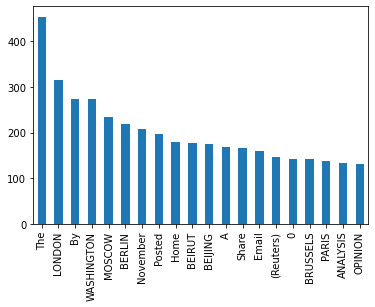

In [20]:
first_word = news_df['text'].str.split().str.get(0)
first_word.value_counts().nlargest(20).plot(kind='bar')


This shows the most common first words from the df. As we can see the location comes up quite a lot as well so I will remove this too.

<AxesSubplot:ylabel='first_word,classification'>

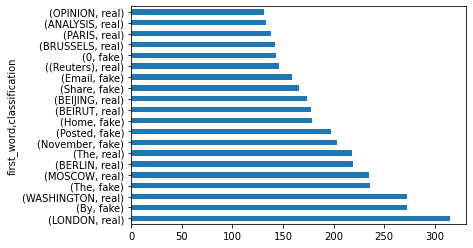

In [21]:
news_df['first_word'] = first_word
fw = news_df.groupby(['first_word', 'classification']).size()
fw.nlargest(20).plot(kind='barh')

Let's remove all the mentions of reuters and all locations

In [22]:
news_df['text'] = news_df['text'].str.replace(r'.*\(Reuters\)', '')


Lets remove the dash too

In [27]:
news_df['text'] = news_df['text'].str.replace(r'-', '')


This graph shows the top 20 most common first words. As we can see the location has now been succesfully removed.

<AxesSubplot:>

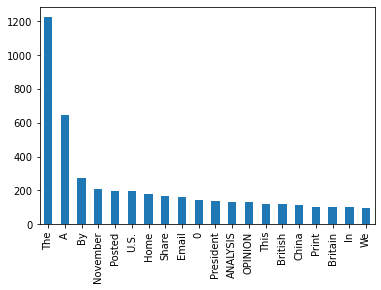

In [28]:
f = news_df['text'].str.split().str.get(0)
f.value_counts().nlargest(20).plot(kind='bar')

However we still have some words like 'analysis', 'opinion', 'by' (as in 'posted by') which could bias the model. So I will also try and remove these.

In [31]:
news_df[news_df['first_word']== 'ANALYSIS']

,headline,text,classification,first_word
5994,Court seems inclined to let abortion providers...,ANALYSIS The Supreme Court heard oral argument...,real,ANALYSIS
6008,"The Malaria Vaccine Is a Big Deal, but Not a S...",ANALYSIS When Patrick Duffy started his career...,real,ANALYSIS
6018,Thousands of people are protesting with farmer...,ANALYSIS Farmers in India have reached a stale...,real,ANALYSIS
6019,Will Biden Pick a USDA Secretary Who Sees Our ...,ANALYSIS The next secretary of the US Departme...,real,ANALYSIS
6020,How to Fix a Food System That's Not Designed t...,"ANALYSIS Earlier this year, Americans learned ...",real,ANALYSIS
...,...,...,...,...
7103,Is it constitutional to hold an impeachment tr...,ANALYSIS No one knows whether the Constitution...,real,ANALYSIS
7109,Why Didn't COVID-19 Kill the Constitution?,ANALYSIS We can thank judges who were prepared...,real,ANALYSIS
7150,The line of culpability for Jan. 6 needs to be...,"ANALYSIS At 1 p.m. on Jan. 6, there were suppo...",real,ANALYSIS
7163,Biden's Support Among Independents Has Crashed,ANALYSIS We are living through the era of unpo...,real,ANALYSIS


Lets remove the word 'analysis' from the start of these columns

In [32]:
ex =  'ANALYSIS'
news_df['text'] = news_df['text'].str.replace(ex, '')

Lets do the same for 'opinion'

In [33]:
news_df[news_df['first_word']== 'OPINION']

,headline,text,classification,first_word
5998,Biden’s Visit to the Vatican,"OPINION In the days of John F. Kennedy, the De...",real,OPINION
6013,Trump’s Opening in Africa,OPINION There isn’t much good news in the worl...,real,OPINION
6058,Joe Rogan Gets It Wrong on Vaccines and Young ...,OPINION For the same reasons that the busiest ...,real,OPINION
6061,Hong Kong’s draconian new security law claims ...,OPINION On july 27th a juryless court in Hong ...,real,OPINION
6073,We Need to Tax the Billionaires Right Now,"OPINION Just over the past week, a billionaire...",real,OPINION
...,...,...,...,...
7139,Our Government Needs to Prioritize Veteran Wel...,OPINION “I got out of the Marines and within a...,real,OPINION
7146,"On Memorial Day, Remember Skepticism Toward a ...","OPINION In recent years, it's become common to...",real,OPINION
7159,‘Our Broken Elections’: Who Broke Them and Why...,OPINION Election integrity is a fundamental re...,real,OPINION
7162,How Virginia Democrats Are Working To Make Ele...,OPINION This portends poorly for the future of...,real,OPINION


In [34]:
ex =  'OPINION'
news_df['text'] = news_df['text'].str.replace(ex, '')

Now lets take a look at the text which starts with 'By'.

In [35]:
news_df[news_df['first_word']== 'By']

,headline,text,classification,first_word
7289,“Genocide Denial” in Canada,"By John Bart Gerald Global Research, October 2...",fake,By
7312,Trump controlled by Mossad,"By wmw_admin on October 30, 2016 By Timothy Fi...",fake,By
7316,If Catcalls Were Politically Correct…,"By wmw_admin on September 16, 2008 The ‘dots’...",fake,By
7321,Dreaming Beyond Capitalism: a Culture Without ...,By Martin Winiecki / kosmosjournal.org In the...,fake,By
7347,Aleppo’s agony is far from over as Syrian gene...,"By Robert Fisk on November 2, 2016 Robert Fisk...",fake,By
...,...,...,...,...
14618,Trump Whistles His Dogs,"By Gilad Atzmon on November 2, 2016 Gilad Atzm...",fake,By
14620,Trump Says His Favorite Book Is No Longer The ...,"By Jameson Parker Election 2016 , Politics Nov...",fake,By
14697,‘Dillary Trumplon’: This Guy’s Epic Rap Song J...,By Nick Bernabe at theantimedia.org The 2016 e...,fake,By
14728,I Envy You,"By Israel Shamir on November 5, 2016 Israel Sh...",fake,By


In [36]:
news_df['text'][7289]

'By John Bart Gerald Global Research, October 26, 2016  On his return from attempting to stop the terrible slaughter of Rwandans there was no official to welcome home Canada’s General Romeo Dallaire. In his recent memoir, Waiting For First Light: My Ongoing Battle with PTSD , (1) Dallaire reveals that his return also began a pattern of suicide attempts, blamed on ptsd, perhaps survivor’s guilt, but which these years later might be traced more accurately to his reluctance to understand that the people who sent him to Rwanda did not care for humanity.  Dallaire, a protector, continues to affirm Canada’s adherence to a code of genocide prevention, on paper, and as a Senior Fellow contributes to the Montreal Institute for Genocide and Human Rights Studies. It is the major Genocide prevention NGO in Canada, but noted for coincidences of policy with those of the U.S. State Department and Canadian foreign service. Any MIGS project concerned with the genocide of U.S. or Canadian Aboriginal peo

In [37]:
# lets remove everything that starts with by and ends in 6

reg_ex = r"^By[a-zA-Z0-9,+.+_+/+ +]*6"
news_df['text'] = news_df['text'].str.replace(reg_ex, '')

Lets take out the word 'posted' and the name of any author or date which follows it.

In [38]:
news_df[news_df['first_word']== 'Posted']

,headline,text,classification,first_word
7262,WikiLeaks: Podesta Had Disturbing ‘Beyond Disc...,"Posted on October 30, 2016 by Baxter Dmitry in...",fake,Posted
7404,Flash-Mob Meditations To Occur At Voting Stati...,"Posted by Madeline | Oct 30, 2016 | 2016 , Dai...",fake,Posted
7408,"Poverty Rose in 96% of U.S. House Districts, D...","Posted on November 5, 2016 by Eric Zuesse. Eri...",fake,Posted
7424,BREAKING: WikiLeaks Just Released Full ISIS Do...,"Posted by Martin Walsh | Oct 28, 2016 | Break...",fake,Posted
7451,Comment on Alicia Keys Calls Original ‘Snow Wh...,"Posted on November 7, 2016 by DCG | 5 Comments...",fake,Posted
...,...,...,...,...
14513,Huma Abedin Seeks FBI Immunity Deal,"Posted on October 30, 2016 by Sean AdlTabataba...",fake,Posted
14538,"Carville Melts Down: Asserts FBI, GOP and KGB ...",Posted 10/31/2016 3:17 pm by PatriotRising wit...,fake,Posted
14625,Videos on the Pacific Crest Trail Association ...,"Posted on October 30, 2016 by Graywolf Publish...",fake,Posted
14738,Media Self-Destruct over Trump,"Posted on October 28, 2016 Media SelfDestruct ...",fake,Posted


In [39]:
reg_ex = r"^Posted[a-zA-Z0-9,+.+_+/+|+ +]*6"
news_df['text'] = news_df['text'].str.replace(reg_ex, '')

In [40]:
news_df[news_df['first_word']== 'posted']

,headline,text,classification,first_word
7269,Leaked Audio Of Hillary Clinton Proposing ‘Rig...,posted by Eddie Hillary Clinton proposed riggi...,fake,posted
7277,Scientists Discover A Lake Under The Sea: Thos...,posted by Eddie A strange ‘lake’ of super salt...,fake,posted
7793,Scientists Claim To Have Found 234 Alien Civil...,posted by Eddie It seems that the long wait to...,fake,posted
7903,Toys “R” Us Stores Offering Quiet Shopping Hou...,posted by Eddie Toys “R” Us stores in the UK a...,fake,posted
7958,Woman Uses Milk And Gelatin To Remove Blackheads,posted by Eddie I’m the kind of person who not...,fake,posted
...,...,...,...,...
14429,EBOLA VICTIM RISES FROM THE DEAD IN AFRICA,posted by Eddie In a surprising twist to the E...,fake,posted
14449,TripAdvisor Will No Longer Sell Tickets To Ani...,posted by Eddie One of the world’s largest tra...,fake,posted
14450,Two People Connected To Flint Water Investigat...,posted by Eddie Two people who were connected ...,fake,posted
14512,Steve Jobs Told Mark Zuckerberg To Visit This ...,"posted by Eddie During the Indian PM, Narendra...",fake,posted


In [41]:
reg_ex = r"^posted.by.Eddie"
news_df['text'] = news_df['text'].str.replace(reg_ex, '')

Lets also try and remove mentions of 'share' and 'email'.

In [42]:
news_df[news_df['first_word']== 'Share']

,headline,text,classification,first_word
7279,Donald Trump Names White Supremacist As Chief ...,"Share on Facebook Many of us, for some time n...",fake,Share
7314,The Trump Campaign Actually Has a Hillary 'Vot...,Share on Twitter You've all heard by now that...,fake,Share
7435,CNN Host Scolds Conway on Trump's Treatment of...,Share on Twitter Donald Trump's campaign mana...,fake,Share
7441,Vladimir Putin Is Ready To Restore Relations W...,Share on Facebook Russia is ready and looks fo...,fake,Share
7445,200 Killed in Iraq; Shi’ite Militias Join Mosu...,Share This Shi’ite militiamen announced they h...,fake,Share
...,...,...,...,...
14658,Trump Voter Arrested When Officials See What H...,Share This A Trump supporter was arrested afte...,fake,Share
14712,Video: Trump Explains The Syrian Conflict And ...,Share on Facebook If you remember the Texas pr...,fake,Share
14733,Legendary US Gymnastics Coach Bela Karolyi May...,Share on Twitter An unidentified former Olymp...,fake,Share
14737,Man’s Collapsed Driveway Reveals Hole & Ladder...,Share This A man was pulling out of his drive...,fake,Share


In [43]:
reg_ex = r"^Share.on.Facebook"
reg_ex2 = r"^Share.on.Twitter"
reg_ex3 = r"^Share.This"

In [44]:
news_df['text'] = news_df['text'].str.replace(reg_ex, '')
news_df['text'] = news_df['text'].str.replace(reg_ex2, '')
news_df['text'] = news_df['text'].str.replace(reg_ex3, '')

In [45]:
news_df[news_df['first_word']== 'Email']

,headline,text,classification,first_word
7268,Re: Obama Administration Allowing US Troops to...,Email It is never so clear cut in war as it i...,fake,Email
7303,America at the Crossroads: Abrogation of Democ...,"Email Election eve, one finds the nation itse...",fake,Email
7364,UNAUTHORIZED VIDEO Of Hillary and Huma Leaks –...,Email Print Hillary Clinton got the shock of h...,fake,Email
7383,Watch: These Are The 5 States Hillary Must STE...,Email The fix is in. If the latest flurry of...,fake,Email
7440,"Blame Government, Not Markets for Monopoly",Email When TimeWarner announced it planned to...,fake,Email
...,...,...,...,...
14486,Hannity: FBI Knows They Are About to Be Expose...,Email Print Sean Hannity said on his radio sho...,fake,Email
14524,McCain Backtracks on Opposition to Any Clinton...,"Email To no one’s surprise, Senator John McCa...",fake,Email
14557,Desecrating the Koran? Police Arrest 9-Year-Ol...,"Email According to the reports, it appears th...",fake,Email
14590,Forget the Trump-Clinton Charade: It’s Time to...,Email Who will be the winners and the losers ...,fake,Email


In [46]:
reg_ex = r"^Email"
news_df['text'] = news_df['text'].str.replace(reg_ex, '')

In [47]:
news_df[news_df['first_word']== '0']

,headline,text,classification,first_word
7359,Hillary Clinton Steps Off Plane & Learns FBI H...,0 comments Hillary Clinton learned that the F...,fake,0
7414,This is What Happens When You Google “PATHOLOG...,"0 comments On Sunday night, just days after t...",fake,0
7464,World Watches On Helplessly As Americans Ameri...,0 Add Comment VOTING continues across America...,fake,0
7493,BREAKING: Obama: “We Have Not Had a Major Scan...,0 comments Obama was speaking to donors at a p...,fake,0
7498,Rats Pictured Leaving Sinking OCI Headquarters,"0 Add Comment IN a blow to the impeccable, bu...",fake,0
...,...,...,...,...
14541,BREAKING: Watch In Awe As Melania Trump Gives ...,"0 Okay, So I’m just gonna go on ahead and say...",fake,0
14671,"Obama Gets DESPERATE, Tells Americans Trump Wi...",0 comments The Democrats are getting really n...,fake,0
14710,"Planet X, Nibiru,Slovakia 2016","0 Planet X, Nibiru, Slovakia 2016 Is our sol...",fake,0
14731,Texas A&M Student Crashes Into Cop While Tryin...,0 comments A 19yearold Texas A&M student has ...,fake,0


In [48]:
reg_ex = r"^0.comments"
news_df['text'] = news_df['text'].str.replace(reg_ex, '')

In [49]:
news_df.to_csv('news_df_copy.csv', index=False)

## **Text pre-processing**

- Before we can model the data we need to do a bit more text pre-processing.
- We need to deal with the following things:
- Stop words - these are words such as 'the', 'a' etc. These don't add any value to the model.
- Remove punctuation as well as any remaining HTML tags, URLs etc - these add no value to the data.
- Lemmatization - this means reducing a word to its stem form. Eg playing, plays and played would all be reduced to just 'play'.

In [3]:
news_df = pd.read_csv('news_df_copy.csv')
news_df

,headline,text,classification,first_word
0,Tillerson to visit Africa in first quarter of ...,U.S. Secretary of State Rex Tillerson is pla...,real,RAMSTEIN
1,Swedish court sentences Syrian asylum seeker t...,A Swedish court on Monday sentenced a Syrian...,real,STOCKHOLM
2,Irish election likely after opposition submits...,An Irish general election appeared likely af...,real,DUBLIN
3,Argentina blocks some activists from attending...,Argentina revoked the credentials of some ac...,real,BUENOS
4,"Kremlin, after Kurdish vote, says supports int...",The Kremlin on Tuesday signaled its oppositi...,real,MOSCOW
...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"Earlier this year, in a speech to the Africa...",fake,0
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake,Carol
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake,This
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake,Philippines


Lets deal with the punctuation first

In [4]:
import string

def remove_punc(text):
       
   # remove html tags   
   text = re.sub('<[^>]*>', '', text) 
   # remove non alphabetic characters
   text = re.sub('[^a-zA-Z]' , ' ' , text)
   # remove emojis
   emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
   text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
   # return text without any punctuation
   return ''.join([word for word in text if word not in string.punctuation])
   
   

In [5]:
news_df['text_cleaned'] = news_df['text'].apply(lambda x: remove_punc(str(x)))

In [6]:
news_df

,headline,text,classification,first_word,text_cleaned
0,Tillerson to visit Africa in first quarter of ...,U.S. Secretary of State Rex Tillerson is pla...,real,RAMSTEIN,u s secretary of state rex tillerson is plann...
1,Swedish court sentences Syrian asylum seeker t...,A Swedish court on Monday sentenced a Syrian...,real,STOCKHOLM,a swedish court on monday sentenced a syrian ...
2,Irish election likely after opposition submits...,An Irish general election appeared likely af...,real,DUBLIN,an irish general election appeared likely aft...
3,Argentina blocks some activists from attending...,Argentina revoked the credentials of some ac...,real,BUENOS,argentina revoked the credentials of some act...
4,"Kremlin, after Kurdish vote, says supports int...",The Kremlin on Tuesday signaled its oppositi...,real,MOSCOW,the kremlin on tuesday signaled its oppositio...
...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"Earlier this year, in a speech to the Africa...",fake,0,earlier this year in a speech to the african ...
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake,Carol,carol adl in news world comment spain is havi...
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake,This,this post was originally published on this sit...
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake,Philippines,philippines president turning his country awa...


Removing the stop words and lemmatizing the text

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
stopwords = nltk.corpus.stopwords.words('english')
lemma = WordNetLemmatizer()

In [8]:
#Function for removing the stopwords and lemmatizing that text

def text_transform(text):
    #Defining empty string
    string = ""
    
    for word in str(text).split():
        if word not in stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [9]:
news_df['text_transformed'] = news_df.text_cleaned.apply(text_transform)
news_df

,headline,text,classification,first_word,text_cleaned,text_transformed
0,Tillerson to visit Africa in first quarter of ...,U.S. Secretary of State Rex Tillerson is pla...,real,RAMSTEIN,u s secretary of state rex tillerson is plann...,u secretary state rex tillerson planning trip ...
1,Swedish court sentences Syrian asylum seeker t...,A Swedish court on Monday sentenced a Syrian...,real,STOCKHOLM,a swedish court on monday sentenced a syrian ...,swedish court monday sentenced syrian asylum s...
2,Irish election likely after opposition submits...,An Irish general election appeared likely af...,real,DUBLIN,an irish general election appeared likely aft...,irish general election appeared likely opposit...
3,Argentina blocks some activists from attending...,Argentina revoked the credentials of some ac...,real,BUENOS,argentina revoked the credentials of some act...,argentina revoked credential activist accredit...
4,"Kremlin, after Kurdish vote, says supports int...",The Kremlin on Tuesday signaled its oppositi...,real,MOSCOW,the kremlin on tuesday signaled its oppositio...,kremlin tuesday signaled opposition kurdishhel...
...,...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"Earlier this year, in a speech to the Africa...",fake,0,earlier this year in a speech to the african ...,earlier year speech african union ethiopia pre...
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake,Carol,carol adl in news world comment spain is havi...,carol adl news world comment spain review deci...
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake,This,this post was originally published on this sit...,post originally published site riot caused pub...
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake,Philippines,philippines president turning his country awa...,philippine president turning country away u pi...


Now lets apply the same changes to the headline column. We can also use this column in the model to classify the news articles.

In [10]:
news_df['headline_cleaned'] = news_df['headline'].apply(lambda x: remove_punc(str(x)))

news_df['headline_transformed'] = news_df['headline_cleaned'].apply(lambda x: text_transform(x))

news_df = news_df.drop(columns=['first_word'])


In [11]:
news_df['headline_text_merged'] = news_df["headline_transformed"] + news_df["text_transformed"]
news_df

,headline,text,classification,text_cleaned,text_transformed,headline_cleaned,headline_transformed,headline_text_merged
0,Tillerson to visit Africa in first quarter of ...,U.S. Secretary of State Rex Tillerson is pla...,real,u s secretary of state rex tillerson is plann...,u secretary state rex tillerson planning trip ...,tillerson to visit africa in first quarter of ...,tillerson visit africa first quarter adviser,tillerson visit africa first quarter adviser u...
1,Swedish court sentences Syrian asylum seeker t...,A Swedish court on Monday sentenced a Syrian...,real,a swedish court on monday sentenced a syrian ...,swedish court monday sentenced syrian asylum s...,swedish court sentences syrian asylum seeker t...,swedish court sentence syrian asylum seeker pr...,swedish court sentence syrian asylum seeker pr...
2,Irish election likely after opposition submits...,An Irish general election appeared likely af...,real,an irish general election appeared likely aft...,irish general election appeared likely opposit...,irish election likely after opposition submits...,irish election likely opposition submits confi...,irish election likely opposition submits confi...
3,Argentina blocks some activists from attending...,Argentina revoked the credentials of some ac...,real,argentina revoked the credentials of some act...,argentina revoked credential activist accredit...,argentina blocks some activists from attending...,argentina block activist attending wto meeting,argentina block activist attending wto meeting...
4,"Kremlin, after Kurdish vote, says supports int...",The Kremlin on Tuesday signaled its oppositi...,real,the kremlin on tuesday signaled its oppositio...,kremlin tuesday signaled opposition kurdishhel...,kremlin after kurdish vote says supports integ...,kremlin kurdish vote say support integrity reg...,kremlin kurdish vote say support integrity reg...
...,...,...,...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"Earlier this year, in a speech to the Africa...",fake,earlier this year in a speech to the african ...,earlier year speech african union ethiopia pre...,obama said america wants him back for a rd ter...,obama said america want back rd term america r...,obama said america want back rd term america r...
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake,carol adl in news world comment spain is havi...,carol adl news world comment spain review deci...,spain to review permission for syria bound rus...,spain review permission syria bound russian sh...,spain review permission syria bound russian sh...
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake,this post was originally published on this sit...,post originally published site riot caused pub...,pakistan conducts training maneuvers at the bo...,pakistan conduct training maneuver border indi...,pakistan conduct training maneuver border indi...
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake,philippines president turning his country awa...,philippine president turning country away u pi...,us in danger of losing allies in asia,u danger losing ally asia,u danger losing ally asia philippine president...


In [12]:
news_df['headline_text_merged'].isna().sum()

0

In [13]:
news_df.to_csv('news_df_cleaned.csv', index=False)